<a href="https://colab.research.google.com/github/hamagami/is2024/blob/main/is04_SimpleNNwithSomeActivationFunctions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A simple NN demo using PyTorch
Implementing a neural network from scratch can be challenging, but frameworks make it easy to achieve.
Here, we’ll solve a donut-shaped classification problem (a nonlinear problem) by experimenting with different activation functions.

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
# Data preparation for donut-shaped classification problem
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.05)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

In [4]:
# Neural network class definition with pytorch framework
class SimpleNN(nn.Module):
    def __init__(self, activation_func):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(2, 10)
        self.layer2 = nn.Linear(10, 10)
        self.output = nn.Linear(10, 1)
        self.activation = activation_func

    def forward(self, x):
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = torch.sigmoid(self.output(x))  # Use sigmoid in the output layer to get probabilities between 0 and 1
        return x

In [5]:
# Definition of stepwise activation function
class StepActivation(nn.Module):
    def forward(self, x):
        return torch.where(x > 0, torch.tensor(1.0), torch.tensor(0.0))

# Training and evaluation function
def train_and_evaluate(activation_func, func_name):
    model = SimpleNN(activation_func)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    epochs = 1000

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        y_pred = model(X_test)
        y_pred_class = (y_pred > 0.5).float()
        accuracy = accuracy_score(y_test, y_pred_class)
        print(f"Activation: {func_name} | Accuracy: {accuracy:.2f}")

        # Plot the results
        plot_decision_boundary(model, X_test, y_test, title=f"Activation: {func_name}")

# Decision boundary plotting function
def plot_decision_boundary(model, X, y, title=""):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    with torch.no_grad():
        preds = model(grid)
        preds = preds.reshape(xx.shape)
    plt.contourf(xx, yy, preds, levels=[0, 0.5, 1], alpha=0.6, cmap="coolwarm")
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap="coolwarm", edgecolors="k")
    plt.title(title)
    plt.show()

# Train and evaluate with each activation function
activation_functions = {
    "Sigmoid": nn.Sigmoid(),
    "Stepwise": StepActivation(),
    "ReLU": nn.ReLU(),
    "Linear": nn.Identity()
}


Activation: Sigmoid | Accuracy: 1.00


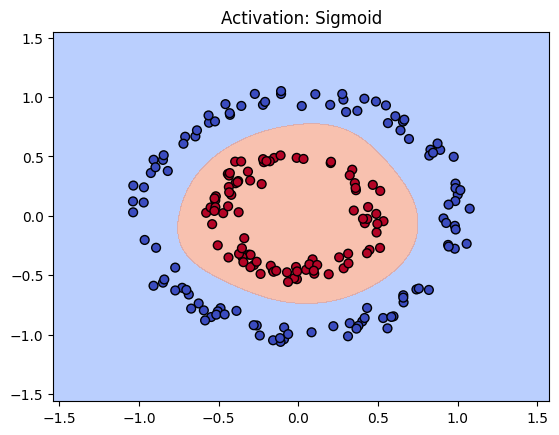

Activation: Stepwise | Accuracy: 0.76


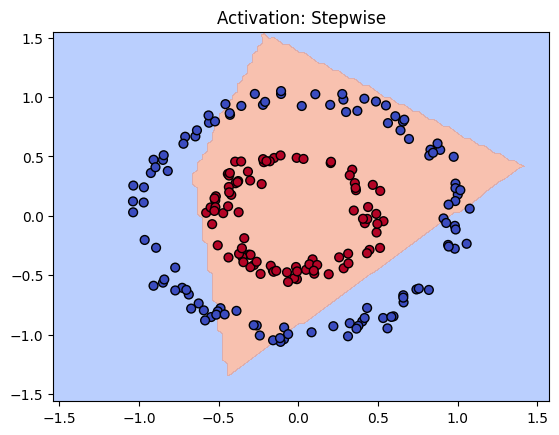

Activation: ReLU | Accuracy: 1.00


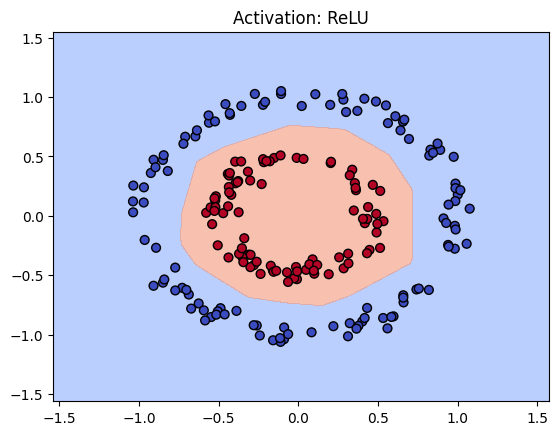

Activation: Linear | Accuracy: 0.52


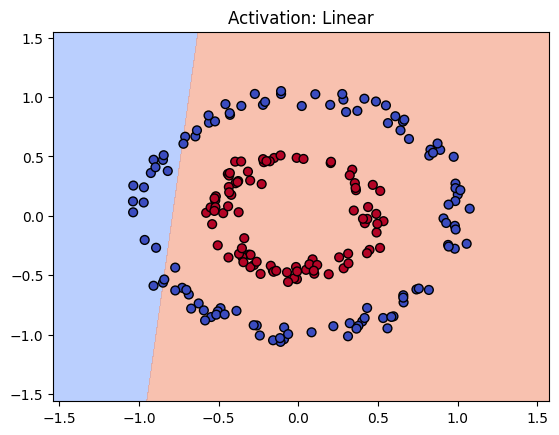

In [6]:
# Execute training and evaluation for each activation function
for name, activation in activation_functions.items():
    train_and_evaluate(activation, name)